# iPython notebook

Pre-requisites: Anaconda (Python) and Git need to be installed on your computer. The Astronomy Department offers Desktops in Angell Hall (5180A and 5190) and on the 4th Floor of West Hall (the Undergraduate "Lab") with the pre-requisite software installed.

If you are seeing this page as an HTML rendering in your browser (i.e., you a loaded a file with ".html" on the end if it), than you need to go back and download the ".ipynb" file (the ipython notebook) and then start ipython notebook to load that file. <i>If you do not, this tutorial will not be interactive.</i>

On a Mac or Linux computer, first open up a terminal, X-window, or CMD interface (in Mac, go to App-> Utilities -> Terminal; in Windows go to the Start and run "cmd"). 

Once you are in the terminal, you will see a command line prompt that look something like:
<img src="http://radar.spacebar.org/img/1212854429-2071074331-thumb.gif" />
Well, your terminal won't look exactly like the <a href="http://lostpedia.wikia.com/wiki/Push_the_button">Swan terminal</a> , since hopefully your terminal doesn't have the numbers <i>4 8 15 16 23 42</i> . That would be scary. Now type:

> \>mkdir my_work

> \>cd my_work

> \>git clone https://chrism71@bitbucket.org/astro361fall2015/introduction.git

> \>cd introduction

> \>ipython notebook Introduction\ to\ iPython\ Notebooks\ and\ Git\ \(for\ Astronomers\).ipynb

Here is an <b>image</b> of M42 I found on the interwebs (<i>credit NOAO</i>): <img src="https://www.noao.edu/image_gallery/images/d3/02677a.jpg" />

In [2]:
x = range(10)
print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In the cell above, highlight the word <b> range </b> type shift-tab simultaneously. Do it again. What do you see?

As you make an iPython notebook, you can save it as an iPython noteook (i.e., with a .ipynb extension). What does an iPython file actually look like?

## NumPy Examples

<a href="http://www.numpy.org">NumPy</a> is the main Python package for working with N-dimensional arrays. Any list of numbers can be recast as a NumPy array:

In [3]:
import numpy as np
x = np.array([1, 5, 3, 4, 2])
x

array([1, 5, 3, 4, 2])

Arrays have a number of useful methods associated with them:

In [4]:
print x.min(), x.max(), x.sum(), x.argmin(), x.argmax() 

1 5 15 0 1


and NumPy functions can act on arrays in an elementwise fashion: 

In [5]:
np.sin(x * np.pi / 180.)

array([ 0.01745241,  0.08715574,  0.05233596,  0.06975647,  0.0348995 ])

Ranges of values are easily produced:

In [6]:
np.arange(1, 10, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [7]:
np.linspace(1, 10, 5)

array([  1.  ,   3.25,   5.5 ,   7.75,  10.  ])

In [8]:
np.logspace(1, 3, 5)

array([   10.        ,    31.6227766 ,   100.        ,   316.22776602,
        1000.        ])

Random numbers are also easily generated in the half-open interval [0, 1):

In [9]:
np.random.random(10)

array([ 0.83671748,  0.30486085,  0.10506682,  0.08690581,  0.67407104,
        0.08723558,  0.69416834,  0.84458182,  0.58765221,  0.62475038])

or from one of the large number of statistical distributions provided:

In [10]:
np.random.normal(loc = 2.5, scale = 5, size = 10)

array([  0.96454929,  -3.68710864,   3.49199425,  12.50585921,
       -11.26645065,   1.86120158,  -2.42299409,   2.18483181,
         3.64584427,   7.71973716])

Another useful method is the <i>where</i> function for identifying elements that satisfy a particular condition: 

In [11]:
x = np.random.normal(size = 100)
np.where(x > 3.)

(array([], dtype=int64),)

Of course, all of these work equally well with multidimensional arrays.

In [12]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
np.sin(x)

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111]])

#<font color = "red">Exercise 1:</font>

Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

In [13]:
#Your code here

## Looping

In the following exercises, we will implement loops. 

#### Sources of Error

With any algorithm, there are always two sources of error: <i>roundoff error</i> and <i>truncation error</i>. These errors can be exacerbated when looping.

<i>Roundoff error</i> arises from the error inherent in representing a floating point number
with a finite number of bits in the computer memory.  Look at the example below that demonstrates roundoff error.  Find $\epsilon$ that satisfies the equation $1 + \epsilon = 1$. You would think (in the analytical world) that it simply means $\epsilon = 0$.  However, in the numerical world we find that this equation is satisfied when the value of $\epsilon > 0$!  What is that strange value?  It is the limit of machine precision.  

Let's start with $\epsilon = 1$ and iterate, halving $\epsilon$ each time until in the computer representation $1 + \epsilon = 1$.  Try it (Shift-Enter to execute the cell below).

In [14]:
eps = 1.0
while 1.0+eps != 1.0:
    eps = eps/2.
print "eps = {0}".format(eps)

eps = 1.11022302463e-16


Why is eps not equal to zero? Should it be?

Now let's consider <i>truncation error</i>. Truncation error is a feature of an algorithm: we approximate an equation or function by expanding about some small quantity. By throwing away
higher-order terms, we are truncating that expression and introducing an error in
the representation. If the quantity we expand about is small, then the error is
small. But it is not always the case and we should be vareful.  

Look at the example below, to approximate the cosine function by the Taylor series:
$$\cos(x) = \sum_{k=0}^\infty (-1)^k {x^{2k} \over (2k)!}$$

##### Example: Truncation Error

First, we define a function that calculates the first ten terms of the expansion.  Look at the Python syntax.  It is quite readable.  The thing to notice is the indentation to the right after the "def" line.  Also, the first line imports a standard <i>math</i> library, which contains standard functions such as the factorial.

In [15]:
import math
def fn(x):
    f = 1.0
    for k in range(1, 10):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

Now we can evaluate it at several values of x.  Let's choose $\pi/2$, $5\pi/2$, and $9\pi/2$, <i> for all of which the analytical answer is 0 </i>.  Try it.

In [16]:
pi = 3.141592653
print fn(pi/2.), fn(pi*5./2.), fn(pi*9./2.)

2.94893069629e-10 -0.288537643744 -28678.7205531


The result may seem strange at first, but it should not surprise us.  All three arguments are greater than unity, and therefore convergence of the series is slow.  Especially, for $x = 9\pi/2 \approx 14$.

This is also a good place to think about the efficiency of our calculation.  Each new term in the series is based on the previous term, times an additional factor.  Since we know this property before making the calculation, we can utilize it to reduce the number of multiplications and speed up the code. Look at the function below.  We can use an internal Python routine to time our calculations and compare the speed of evaluation of the two functions.

In [17]:
print fn(pi*9./2.)
%timeit -n 5000 fn(pi*9./2.)

-28678.7205531
5000 loops, best of 3: 13.9 µs per loop


#<font color = "red">Exercise 2:</font>

Write code to find <i>k</i> such that <b>fn(x)</b> converges (i.e., that by increasing <i>k</i>, the result no longer changes). 

## Reading in ascii data from a file

Data can also be automatically loaded from a file into a Numpy array via the <i>loadtxt</i> or <i>genfromtxt</i> methods. Make sure you have the datafile <i>andreon_tab1.csv.</i> in your working directory, or specify your path, or append a path to the system. <b> Note that if you reset your path, you must reload numpy in order for loadtxt to see the revision.</b>

In [7]:
import sys
root = '/u/home/christoq/Classes/Astro361/Fall2015/introduction/'
sys.path.append(root)
import numpy as np
dt =  [('m200',float),('m200e',float),('obstot1',int),('obsbkg1',int), ('c',float)]
data1 = np.loadtxt('andreon_tab1.csv', dtype=dt, skiprows=(1), usecols=(11,12,1,2,3),delimiter=',')
cmd='more andreon_tab1.csv'
import subprocess
print subprocess.check_output(cmd,shell=True)

::::::::::::::
andreon_tab1.csv
::::::::::::::
NAME,          obstot1, obsbkg1, c1, obstot2, c2, n200,r500,  r200, rt,     rmax, m200,m200e  ,mt,mte, ratio, ra, dec, z, lx43, cat, tx,vdisp, vdispp, vdispm,class,rcomp
A0160,28,13, 3.107, 29, 2.951,31,  0.46, 0.67, 2.70,  1.31, 0.68, 0.38,  0.80, 0.54, 1.17,18.27410, 15.51700,0.0432,0.092 , NOR,   2.70,489, 62,45,2, 0.7
A0602,45,37, 3.186, 23, 10.77,29, 0.84, 1.23, 5.45,  2.32, 4.34, 0.44,  6.57, 0.66, 1.51,118.35100, 29.36600,0.0606,0.289 , BCS,   0.00,712, 81,60,2, 2.0 
A0671,44,20, 2.545, 36, 5.443,37, 0.76, 1.12, 4.76,  3.94, 3.23, 1.02,  4.40, 1.49, 1.36,127.16210, 30.42800,0.0503,0.205 , NOR,   0.00,854, 72,57,2,11.8
A0779,27,0 ,0.2245, 19, 0.4303,29, 0.64, 0.92, 3.89,  2.12, 1.80, 0.30,  2.40, 0.46, 1.33,139.92200, 33.76300,0.0233,0.024,  eBCS,  1.92,528, 45,36,2, 2.2
A0957,33,20, 4.605, 26, 7.947,29, 0.64, 0.88, 3.37,  0.71, 1.58, 0.98,  1.55, 0.96, 0.98,153.41790 ,-0.91440,0.0455,0.223 , REF,   0.00,763, 85,64,1, 0.3
A0954,27,16

In [19]:
print data1['m200']

[ 0.68  4.34  3.23  1.8   1.58  0.59  4.46  1.09  4.68  3.46  2.19  0.95
  2.37  2.06  2.67  2.73  1.72  1.31  2.76  0.86  1.67  0.73  2.5   1.79
  3.99  0.58  2.92  0.57  0.34  1.59  6.03  1.98  0.38  1.32  4.5   0.44
  1.65  5.27  0.41  1.74  6.06  3.38  1.05  0.79  0.73  2.39  5.33  4.31
  7.51  1.52  1.01  1.44  1.88]


##Matplotlib Visualization Exercises

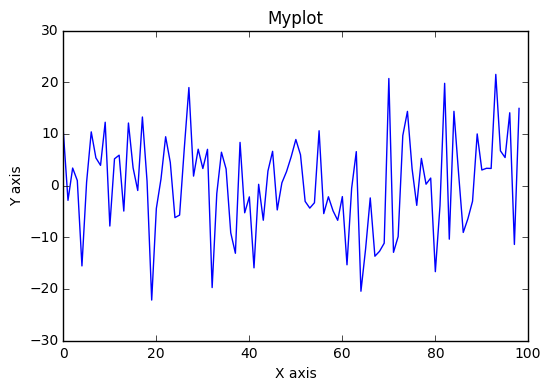

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100  # this makes all the plots a little bigger
x = np.arange(0,99,dtype=float)
y = np.random.normal(0,10,(99,))
plt.plot(x,y)
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.title('Myplot')
plt.show()

Side by side panels:

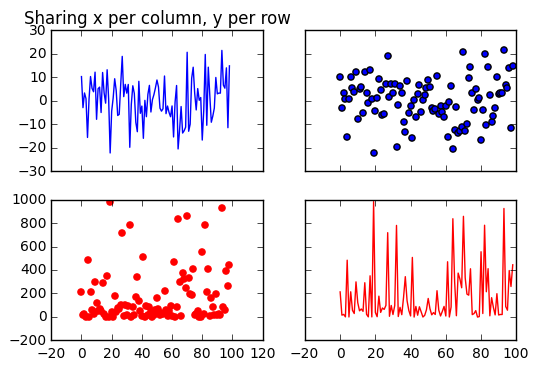

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show() # OR plt.savefig('sine_function_legend.png')

Including errors

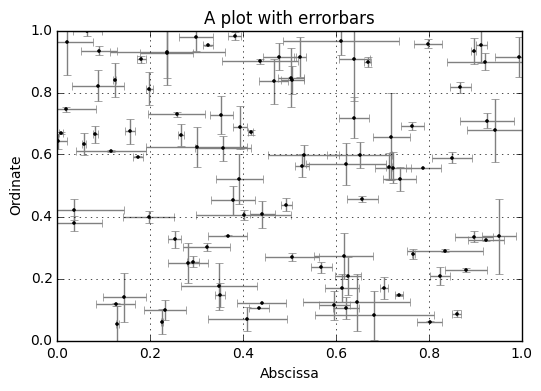

In [11]:
x, y = np.random.random([2, 100])
xerr = np.random.normal(0., 0.05, 100)
yerr = np.random.normal(0., 0.05, 100)
plt.errorbar(x, y, xerr, yerr, fmt = '.k', ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A plot with errorbars')

3D visualizations:

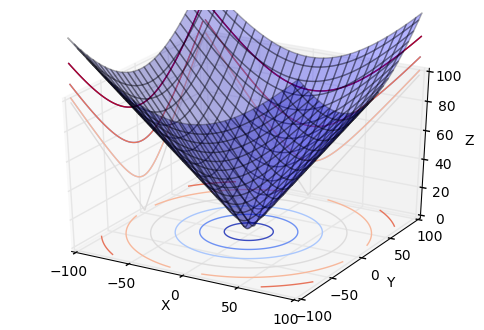

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def fun(x, y):
     return np.sqrt(pow(x,2) + pow(y,2))

x = y = np.arange(-99,99,dtype=float)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3, label = 'Euclidean Distance')
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=100, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_xlim(-100, 100)
ax.set_ylabel('Y')
ax.set_ylim(-100, 100)
ax.set_zlabel('Z')
ax.set_zlim(0, 100)
plt.show()

Let's make a simple histogram. What should these data look like?

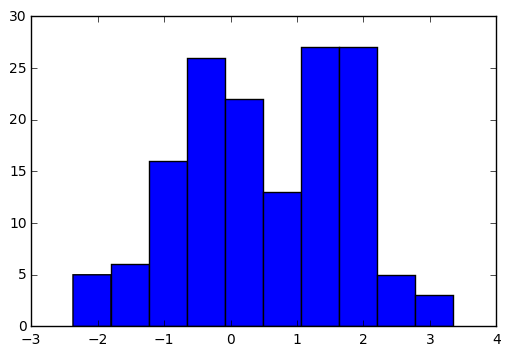

In [13]:
x = np.concatenate([np.random.normal(0., 1., 100), np.random.normal(2, 0.5, 50)])
plt.hist(x)
plt.show()

The bin width (and so number of bins) and bin placement remain somewhat arbitrary. This can affect the interpretation of this histogram as features may be missed. There is also the question of what to do with sparsely sampled bins. There are a number of 'theoretical' recommendations for the number of bins, $k$, to use, such as Sturges's formula $k = \log_2n + 1$, and Simon's rule, $k = 3.5\sigma /n^{1/3}$, but they are all assume an approximately normal distribution.
The Freedman-Diaconis rule attempts to generalize Simon's rule for non-Gaussian distributions: $k = 2.7 \sigma_{IQR} / n^{1/3}$.

From a Bayesian perspective, we can treat the histogram as a piecewise constant model of the underlying density function with the logarithm of the posterior probability then given by Knuth's rule: 


$$ N \log M + \log \left[\Gamma\left(\frac{M}{2}\right)\right] - M \log \left[ \Gamma \left(\frac{1}{2} \right) \right] - \log \left[ \Gamma \left(N + \frac{M}{2} \right) \right] + \sum_{k=1}^{M} \log\left[\Gamma\left(n_k + \frac{1}{2}\right)\right] $$

which is maximized by the number of bins, $M$, with $n_k$ measurements in bin $k$.

An alternate solution is to relax the idea of a fixed bin width and instead allos uneven (arbitrary) bin widths. Factoring this into the methodology behind Knuth's rule gives <i>Bayesian blocks</i>. An additional feature of Bayesian blocks is that they are an optimal binning and so statistical significance can be assigned to the bin configuration. This has signal detection applications in time domain astronomy http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

Fortunately, these various binning systems are available with the <i>astroML.plotting</i> package <i>hist</i>:

(array([  6.,  12.,  29.,  28.,  16.,  41.,  15.,   3.]),
 array([-2.37177796, -1.65659321, -0.94140847, -0.22622373,  0.48896102,
         1.20414576,  1.9193305 ,  2.63451524,  3.34969999]),
 <a list of 8 Patch objects>)

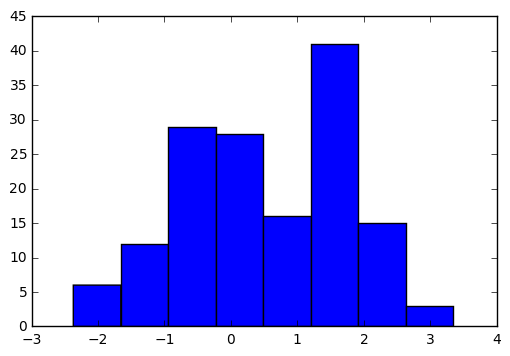

In [14]:
from astroML.plotting import hist
hist(x, bins = 'knuth')

(array([  12.,  132.,    6.]),
 array([-2.37177796, -1.1620576 ,  2.28720862,  3.34969999]),
 <a list of 3 Patch objects>)

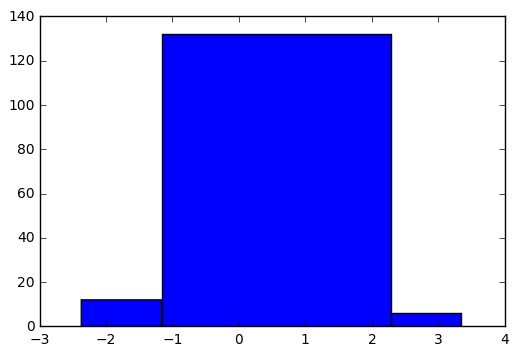

In [15]:
hist(x, bins = 'blocks')

Both of the above techniques from astroML bring statistical rigor to the artform otherwise known as the <i>histogram</i> .

## Scientific Python (SciPy) Examples

Let's perform a definite integral:

$$\int_{1000}^{\infty}\frac{dx}{100x^3}$$

In [16]:
import scipy as sp
from scipy.integrate import quad

def f(x):
    return 0.01*x**-3

integral, error = quad(f, 1000, sp.inf, epsrel = 1e-6,epsabs = 0)
print integral, error

5e-09 4.03619361141e-18


How do we fit a curve to some data? Let's read in a data file and fit a Gaussian to its contents:

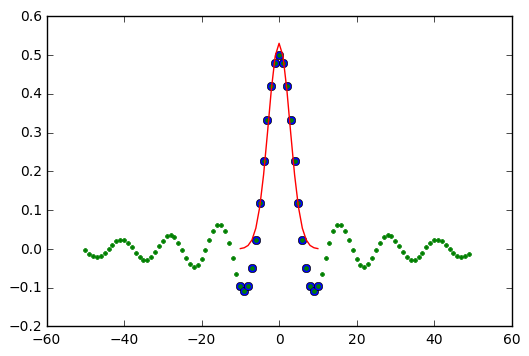

In [17]:
import sys
sys.path.append('/u/home/christoq/Classes/Astro361/Fall2015/introduction/')
import numpy as np
dt = [('x',float), ('y',float)]
data = np.loadtxt('data1.txt', dtype=dt, skiprows=(1))      
x = data['x']
y = data['y']
index_array = np.where((x >= -10) & (x <= 10))
x0 = x[index_array]
y0 = y[index_array]    

from scipy.optimize import curve_fit
def gauss(x, *p):                                                             
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [1., 0., 1.]
coeff, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
hist_fit = gauss(x0, *coeff)
plt.plot(x0,y0,'o')
plt.plot(x,y,'.')
plt.plot(x0,hist_fit,label='Fitted Data')
plt.show()

##Reading and Plotting Astronomical Image Data

Make sure you have the file <i>phiand.fits</i> in your working directory.

Filename: phiand.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (256, 256)   float32   


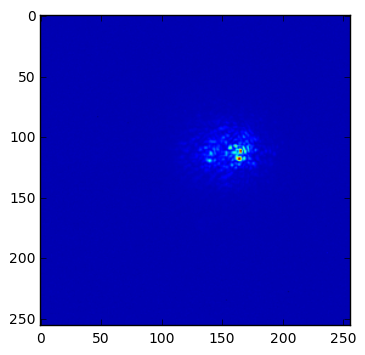

In [18]:
from astropy.io import fits
sys.path.append(root)
image = fits.info('phiand.fits')
image
data = fits.getdata('phiand.fits')
plt.plot(data)
plt.show() # what is this?
plt.imshow(data)
plt.show()

What do the above two panels represent?

Now, let's smooth the second image with a Gaussian kernal:

In [19]:
from scipy import ndimage
blurred_data = ndimage.gaussian_filter(data,sigma=3)
plt.imshow(blurred_data)
plt.show()

Do you see one or two objects (or more?) in the above image?

#<font color = "red">Exercise 3:</font>

Read in the image called <i>andromeda_rot.fits</i>. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy documentation search for 2D Gaussian). Make the labels be in arcseconds (not pixels)

# Git and BitBucket

Imagine that you've just spent three weeks writing a crucial piece of software for your research and your laptop suddenly dies on you. Fortunately, you were savvy enough to make (occasional) backups but then you realize that they are all based on your old design and that none of them incorporate the radical revisioning you dreamt up two nights ago at 3 am and have spent the last 40 hours implementing, surviving only on adrenaline, cold pizza and thick coffee. It's OK, though, I'm sure that you'll remember all those changes...

Version control systems exist to manage software development, keeping track of (commented) changes you make to a code base and allowing you to backtrack, branch off, and refactor to your heart's content (assuming, of course, that you remember to keep the local copy synched with that in the master repository). There are many such systems out there, for example,  <a href="http://subversion.apache.org">Subversion (SVN)</a>, <a href="http://mercurial.selenic.com">Mercurial</a>, and <a href="http://bazaar.canonical.com">Bazaar</a>, all with their own advantages and idiosyncracies, but the one we will talk about here (and encourage you to use this week) is <b>Git</b>. Although you can run your own local git repository (amd you may want to do so at your home institution), we're going to make use of <i>GitHub</i>, which is web-based (and hosted) repository that has a nice browser interface.

So the first thing you'll need to do is install the appropriate <i>git</i> package for your operating system from <a href="https://git-scm.com/downloads">here</a> (assuming it's not already installed). The second thing to do is register for an account on at <a href="http://bitbucket.com">BitBucket</a>. The Professor has created a team repository to use for this class. Send the Professor an email with your BitBucket username and they will add you to the team as a user. <b> Make sure you register using your Michigan email address!.<b>

After you have done so, go to <a href="http://bitbucket.com">BitBucket</a> (you may have to login) and click the tiny book icon next to your username. On the right-hand side you should see a link to <i>TEAMS</i> that you contribute to. Select the one with Astro361Fall2015 in the name. The professor will place files here for you to access.

You need to create your own repository to store your code. Make one new code repository called "Introduction".

Although BitBucket will serve as the master location for your code, the bulk of any development will happen on your machine and we mirror the repository you just created (let's assume you named it "introduction") as a local directory:

<code>> mkdir /some/directory/introduction</code>

Now you'll need to switch to this directory and initialize it for git:

<code>> cd /some/directory/introduction</code>

<code>> git init</code><br/>
<code>Initialized empty Git repository in /some/directory/introduction/.git/</code>

Now, specify the remote location of your BitBucket repository (replace username with your BitBucket username and the word "introduction" with your specific repository):
<br><code>git remote add origin https://username@bitbucket.org/introduction </code><br>

And there you go, you're ready to start writing your code. Obviously at some point, you're going to want to sync the local repository with the master one (otherwise why are we bothering with this). This is a three-stage process (and if you can remember 'add-commit-push' then it is straightforward). Firstly, you need to tell git which files in your local directory you want in the master repository - you may decide initially that you want everything in it but you'll soon find that you end up with all sorts of extra stuff in the local repository that you don't need in the master, such as temporary files for testing, random notes, coffee shop receipts, etc. So for each file that you want to <b>add</b>:

<code>> git add some_algorithm.py</code>

Next you need to tell git to take a snapshot of the code you've just told it about. It's at this point that you also tell git something about this particular version of the code, for example, whether it's an initial version or which bug this change fixes or new feature it adds. These comments are visible on the public view of your code on the GitHub site so it's a good idea to be as informative as possible, otherwise:

<figure>
<img src="http://imgs.xkcd.com/comics/git_commit.png">
<figcaption></figcaption>
</figure>

As the cartoon shows, the command to do this is <b>commit</b> with a <b>-m</b> flag to add an inline comment. If you do not specify the flag then git will take you to a temporary file for you to add commit messages so it's easiest to just add them as inline text:

<code>> git commit -m "Amazing new update to my code!"</code>

Finally, you need to <b>push</b> this all up to BitBucket:

<code>>git push origin master</code>

and the two repositories are now in sync (at least as far as the code you care about is concerned). If at any point you want to check which files are in the repository, which changes still need to be committed (and which branch of the repository you’re currently working on) then you can use:

<code>> git status -v</code>

Let's say now that you want a local copy of one of your colleague's codes that she put into your repository (because she implemented a fabulous algorithm that you want to <strike>steal</strike> also use) then you can check this out with:

<code>> git checkout fastcode</code>

assuming that it's the branch of your repository called "fastcode" and

<code>>git clone http://bitbucket.com/otherProject.git</code>

if it's in an entirely different repository (you can get the URL for this from the BitBucket web page for this repository.

There are (a lot of) other git commands to manage branches, etc. and the BitBucket repository has material on all of these but you  always check out the syntax of a particular one locally with:

<code>> git help <i>command-name</i></code>

#<font color = "red">Exercise 4:</font>

Create a new iPython notebook that contains the above three exercises. Check this code into your BitBucket repository (called Introduction). Give the Professor access to this repo (<b>username chrism71</b>). The Professor will check out your code and run it.